## 📦 Importing Required Libraries

In this section, we import the essential Python libraries used for data handling, visualization, and machine learning.  
These include:
- **NumPy** & **Pandas** for data manipulation
- **Matplotlib** & **Plotly** for visualization
- **Scikit-learn** for building and evaluating machine learning models


In [1]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

## 🛠 Data Wrangling Function

We define a `wrangle()` function to:
- Read the dataset from the provided file path
- Handle missing values or inconsistencies
- Prepare the data for further analysis and modeling


In [2]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    df[["lat","lon"]]=df["lat-lon"].str.split(",",expand=True).astype(float)
    df.drop(columns="lat-lon",inplace=True)
    

    return df

## 📂 Loading Multiple Datasets

Here, we load **two separate CSV files** containing Buenos Aires housing market data.  
This is done by calling the `wrangle()` function for each file.


In [3]:
frame1 = wrangle("buenos-aires-real-estate-1.csv")
print(frame1.info())
frame1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1343 non-null   int64  
 1   operation                   1343 non-null   object 
 2   property_type               1343 non-null   object 
 3   place_with_parent_names     1343 non-null   object 
 4   price                       1343 non-null   float64
 5   currency                    1343 non-null   object 
 6   price_aprox_local_currency  1343 non-null   float64
 7   price_aprox_usd             1343 non-null   float64
 8   surface_total_in_m2         965 non-null    float64
 9   surface_covered_in_m2       1343 non-null   float64
 10  price_usd_per_m2            927 non-null    float64
 11  price_per_m2                1343 non-null   float64
 12  floor                       379 non-null    float64
 13  rooms                       1078 non-n

Unnamed: 0 operation property_type  \
4            5      sell     apartment   
9           10      sell     apartment   
29          30      sell     apartment   
40          41      sell     apartment   
41          42      sell     apartment   

                     place_with_parent_names     price currency  \
4      |Argentina|Capital Federal|Chacarita|  129000.0      USD   
9     |Argentina|Capital Federal|Villa Luro|   87000.0      USD   
29     |Argentina|Capital Federal|Caballito|  118000.0      USD   
40  |Argentina|Capital Federal|Constitución|   57000.0      USD   
41          |Argentina|Capital Federal|Once|   90000.0      USD   

    price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
4                    1955949.6         129000.0                 76.0   
9                    1319128.8          87000.0                 48.0   
29                   1789163.2         118000.0                  NaN   
40                    864256.8          57000.0                 42.0   
41                   1364616.0          90000.0                 57.0   

    surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
4                    70.0       1697.368421   1842.857143    NaN    NaN   
9                    42.0       1812.500000   2071.428571    NaN    NaN   
29                   54.0               NaN   2185.185185    NaN    2.0   
40                   42.0       1357.142857   1357.142857    5.0    2.0   
41                   50.0       1578.947368   1800.000000    NaN    3.0   

    expenses                                      properati_url        lat  \
4        NaN  http://chacarita.properati.com.ar/10qlv_venta_... -34.584651   
9        NaN  http://villa-luro.properati.com.ar/12m82_venta... -34.638979   
29       NaN  http://caballito.properati.com.ar/11wqh_venta_... -34.615847   
40     364.0  http://constitucion.properati.com.ar/k2f0_vent... -34.625222   
41     450.0  http://once.properati.com.ar/suwa_venta_depart... -34.610610   

          lon  
4  -58.454693  
9  -58.500115  
29 -58.459957  
40 -58.382382  
41 -58.412511

In [4]:
frame2 = wrangle("buenos-aires-real-estate-2.csv")

## 🔄 Merging Datasets

We combine the two DataFrames into a single dataset using `pd.concat()`.  
This unified dataset will be used for all subsequent analysis and modeling.


In [5]:
df = pd.concat([frame1,frame2],ignore_index=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2658 non-null   int64  
 1   operation                   2658 non-null   object 
 2   property_type               2658 non-null   object 
 3   place_with_parent_names     2658 non-null   object 
 4   price                       2658 non-null   float64
 5   currency                    2658 non-null   object 
 6   price_aprox_local_currency  2658 non-null   float64
 7   price_aprox_usd             2658 non-null   float64
 8   surface_total_in_m2         1898 non-null   float64
 9   surface_covered_in_m2       2658 non-null   float64
 10  price_usd_per_m2            1818 non-null   float64
 11  price_per_m2                2658 non-null   float64
 12  floor                       769 non-null    float64
 13  rooms                       2137 

Unnamed: 0 operation property_type  \
0           5      sell     apartment   
1          10      sell     apartment   
2          30      sell     apartment   
3          41      sell     apartment   
4          42      sell     apartment   

                    place_with_parent_names     price currency  \
0     |Argentina|Capital Federal|Chacarita|  129000.0      USD   
1    |Argentina|Capital Federal|Villa Luro|   87000.0      USD   
2     |Argentina|Capital Federal|Caballito|  118000.0      USD   
3  |Argentina|Capital Federal|Constitución|   57000.0      USD   
4          |Argentina|Capital Federal|Once|   90000.0      USD   

   price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                   1955949.6         129000.0                 76.0   
1                   1319128.8          87000.0                 48.0   
2                   1789163.2         118000.0                  NaN   
3                    864256.8          57000.0                 42.0   
4                   1364616.0          90000.0                 57.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                   70.0       1697.368421   1842.857143    NaN    NaN   
1                   42.0       1812.500000   2071.428571    NaN    NaN   
2                   54.0               NaN   2185.185185    NaN    2.0   
3                   42.0       1357.142857   1357.142857    5.0    2.0   
4                   50.0       1578.947368   1800.000000    NaN    3.0   

   expenses                                      properati_url        lat  \
0       NaN  http://chacarita.properati.com.ar/10qlv_venta_... -34.584651   
1       NaN  http://villa-luro.properati.com.ar/12m82_venta... -34.638979   
2       NaN  http://caballito.properati.com.ar/11wqh_venta_... -34.615847   
3     364.0  http://constitucion.properati.com.ar/k2f0_vent... -34.625222   
4     450.0  http://once.properati.com.ar/suwa_venta_depart... -34.610610   

         lon  
0 -58.454693  
1 -58.500115  
2 -58.459957  
3 -58.382382  
4 -58.412511

## 🗺 Visualizing Properties on a Map

Using Plotly's `scatter_mapbox()`, we plot property locations based on their **latitude** and **longitude**.  
This helps us visually identify the spatial distribution of properties in Buenos Aires.


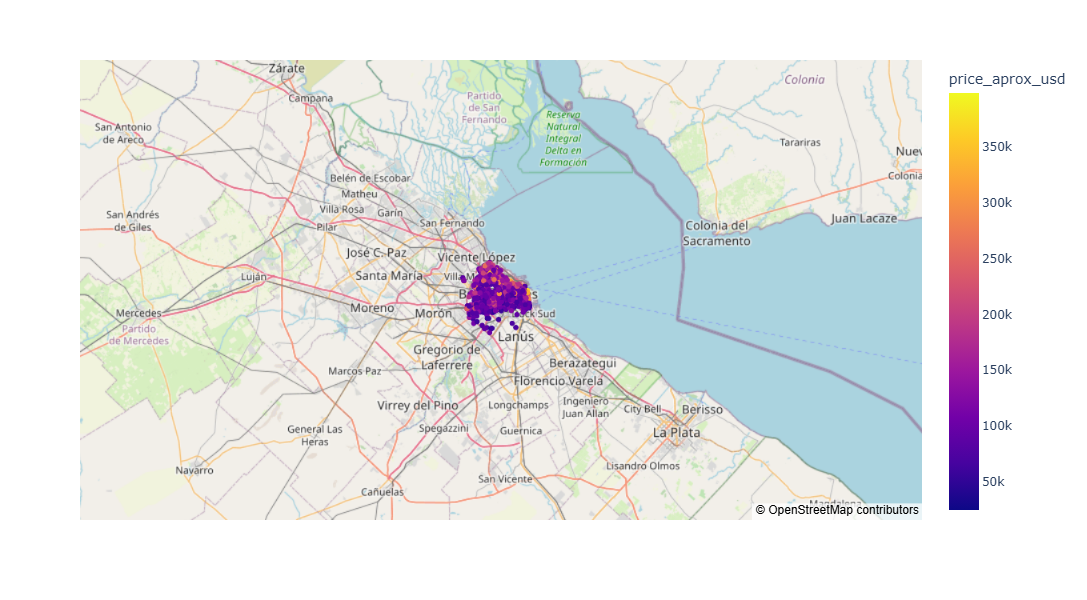

In [6]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= "lat",
    lon= "lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color= "price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## 🌐 3D Visualization of Properties

Here, we create a **3D scatter plot** of property locations.  
This visualization adds depth to our geospatial analysis and can reveal spatial patterns more effectively.


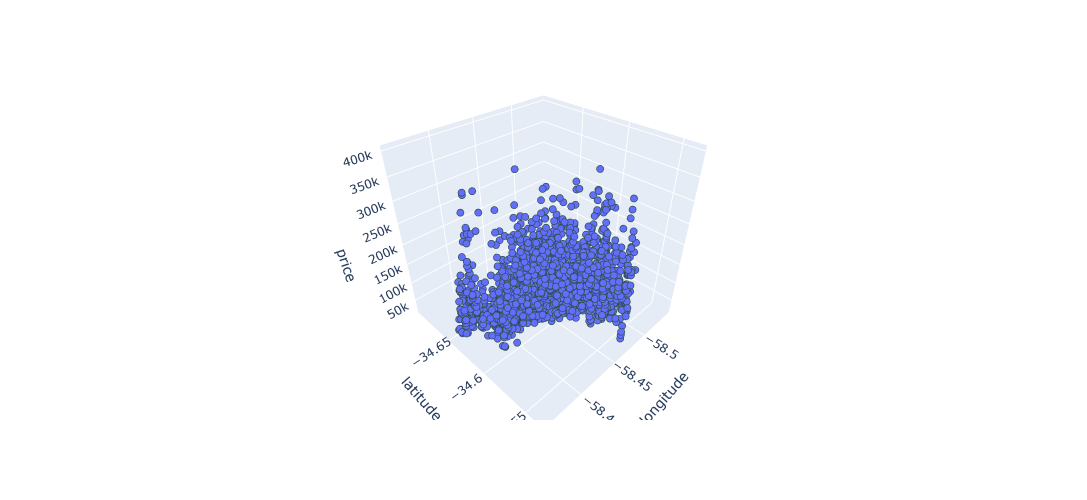

In [7]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x= "lon",
    y= "lat",
    z= "price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## 🏗 Selecting Features for Modeling

We select the **longitude** (`lon`) and **latitude** (`lat`) as the initial features for predicting property prices.  
This will help us analyze the impact of location on price.


In [8]:
features = ["lon", "lat"]
X_train = df[features]
X_train.shape

(2658, 2)

## 🎯 Defining the Target Variable

The target variable is set to **`price_aprox_usd`**, representing the approximate property price in USD.


In [9]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(2658,)

## 📏 Establishing a Baseline Model

We start by creating a simple baseline prediction:
- Predict the **mean property price** for all entries
- This will act as a benchmark for evaluating more complex models


In [10]:
y_mean = y_train.mean()

## 🔹 Generating Baseline Predictions

Here, we apply the baseline (mean) prediction to every record in the dataset.  
The output is stored as `y_pred_baseline`.


In [11]:
y_pred_baseline = [y_mean]*len(y_train)
y_pred_baseline[:5]

[np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562)]

## 📊 Evaluating the Baseline Model

We calculate the **Mean Absolute Error (MAE)** for our baseline predictions.  
This metric will help compare the performance of advanced models.


In [12]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 134732.97
Baseline MAE: 45422.75


## 🧹 Handling Missing Data

We use `SimpleImputer` from Scikit-learn to:
- Identify missing values in the selected features
- Replace them with appropriate values (e.g., mean)

This step ensures our model can work with a complete dataset.


In [13]:
imputer = SimpleImputer()
imputer.fit(X_train)

In [15]:
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2658 non-null   float64
 1   lat     2658 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


## ⚙️ Building the Price Prediction Model

We construct a **machine learning pipeline** that includes:
1. **SimpleImputer** – to handle missing values in the features
2. **LinearRegression** – to train a model for predicting property prices based on location data


In [16]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

## 🏋️ Training the Model

The pipeline is trained using the training features (`X_train`) and the target variable (`y_train`).  
This step allows the model to learn the relationship between property location and price.


In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

## 🔮 Making Predictions on Training Data

The trained model is used to predict prices for the **training set**.  
The predicted values are stored in `y_pred_training`.


In [18]:
y_pred_training = model.predict(X_train)

## 📊 Evaluating the Model on Training Data

We compute the **Mean Absolute Error (MAE)** on the training data.  
This metric helps us understand how close our predictions are to the actual prices.


In [19]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 42962.72


## 🧪 Preparing the Test Dataset

We load the **test dataset** (`buenos-aires-test-features.csv`) and select the same features (`lon`, `lat`) used during training.  
This ensures the model receives data in the same format it was trained on.


In [21]:
X_test = pd.read_csv("buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    136372.324695
1    168620.352353
2    130231.628267
3    102497.549527
4    123482.077850
dtype: float64

## 📐 Extracting the Model Intercept

We retrieve the **intercept** term from the trained linear regression model.  
This value represents the predicted price when all features are zero.


In [22]:
intercept = model.named_steps["linearregression"].intercept_.round()
coefficients = model.named_steps["linearregression"].coef_.round()
coefficients

array([196709., 765467.])

## 📝 Regression Equation

We display the full linear regression equation in the format

This helps in understanding the mathematical relationship between location and property price.


In [23]:
print(
    f"price = {intercept} + ({coefficients[0]} * longitude) + ({coefficients[1]} * latitude)"
)

price = 38113587.0 + (196709.0 * longitude) + (765467.0 * latitude)


## 🌎 Final 3D Visualization

We create a final **3D scatter plot** to visualize properties with their prices and location attributes.  
This gives a more comprehensive view of the spatial and price distribution in Buenos Aires.


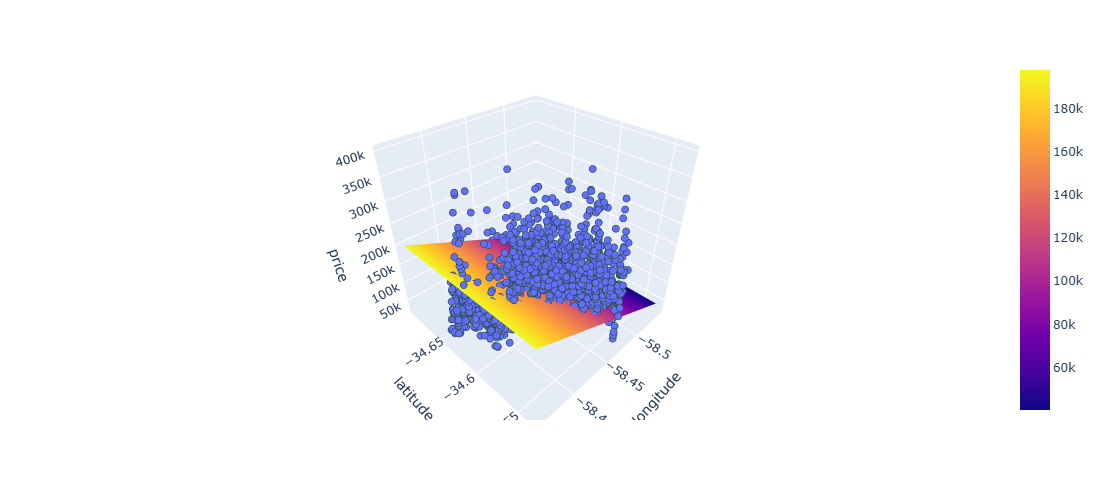

In [24]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x= "lon",
    y= "lat",
    z= "price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"lon": x_plane, "lat": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## ✅ Conclusion

In this project, we:
- Explored Buenos Aires housing data
- Investigated the influence of property size, location, and neighborhood
- Built and evaluated regression models
- Created visualizations to better understand the data

This lays the groundwork for more advanced models that can incorporate additional features such as property type, amenities, and economic indicators.
